In [1]:
import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
test_data = pd.read_csv('task2_lemmas_test', sep=',', header=0, encoding='utf-8')

In [3]:
train_data = pd.read_csv('task2_lemmas_train', sep=',', header=0, encoding='utf-8')

In [4]:
test_data[test_data['X'].isin(train_data['X'])]

Empty DataFrame
Columns: [Id, X]
Index: []

In [5]:
def prepare_data_for_learning():
    for i in range(1, 6):
        train_data['y{}_w'.format(i)] = train_data['y{}'.format(i)].apply(lambda x: x.split('+')[0] if pd.notnull(x) else x)
        train_data['y{}_t'.format(i)] = train_data['y{}'.format(i)].apply(lambda x: x.split('+')[1] if pd.notnull(x) else x)
    train_data.drop(['y{}'.format(i) for i in range(1, 6)], inplace=True, axis=1)

In [6]:
prepare_data_for_learning()

In [7]:
len(train_data[pd.isnull(train_data['y2_w']) == False])

2163

In [8]:
def max_prefix_len(s1, s2):
    i = 0
    board = min(len(s1), len(s2))
    while s1[i] == s2[i]:
        i += 1
        if (i >= board):
            break
    return i

In [9]:
for i in range(1, 6):
    train_data['y{}_l'.format(i)] = train_data['y{}_w'.format(i)].apply(lambda x: len(x) if pd.notnull(x) else x)
train_data['X_l'] = train_data['X'].apply(lambda x: len(x))

In [10]:
for i in range(1, 6):
    train_data['max_prefix{}'.format(i)] = [max_prefix_len(s1, s2)
                                            if (pd.notnull(s1) and pd.notnull(s2)) else s2
                                            for (s1, s2)
                                            in zip(train_data['X'], train_data['y{}_w'.format(i)])
                                           ]

In [11]:
max_prefix_and_X_len = train_data[train_data['y1_t'] == 'V'][['max_prefix1', 'X_l']]

In [12]:
mp = max_prefix_and_X_len['max_prefix1']
xl = max_prefix_and_X_len['X_l']

(array([  1.37587883e-01,   1.77643794e-01,   1.97132803e-01,
          1.45802474e-01,   7.41399453e-02,   8.54230558e-02,
          1.38996099e-02,   1.64291824e-03,   5.21561346e-05,
          8.69268910e-06]),
 array([  0. ,   1.2,   2.4,   3.6,   4.8,   6. ,   7.2,   8.4,   9.6,
         10.8,  12. ]),
 <a list of 10 Patch objects>)

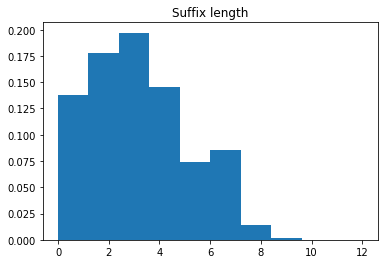

In [13]:
plt.title('Suffix length')
plt.hist(xl-mp, normed=True)

In [14]:
len(train_data[train_data['X_l'] - train_data['max_prefix1'] <= 4])

98413

In [15]:
len(train_data)

118640

In [16]:
# слова в правильной форме
len(train_data[train_data['X_l'] - train_data['max_prefix1'] == 0])

14302

In [17]:
words_in_correct_form = train_data[train_data['X'] == train_data['y1_w']]

In [18]:
correct_words = list(words_in_correct_form['X'])
in_correct_form = [s for s in train_data['y1_w'] if s in correct_words]

In [19]:
len(in_correct_form)

94068

In [20]:
len(train_data[train_data['max_prefix1'] == 0])  # возможно выбросы

70

In [21]:
corrupted = train_data[train_data['max_prefix1'] == 0]['X']

In [22]:
len(train_data[train_data['X'].isin(corrupted)])

70

действительно, других таких X нет, а сами данные вообще-то сильно отличаются от ответовьь

In [23]:
train_data[train_data['max_prefix1'] == 0]

Id             X       y1_w y1_t          y2_w y2_t        y3_w  \
2500      2501       cotiate   scuotere    V    percuotere    V         NaN   
6881      6882      siederai   risedere    V  soprassedere    V         NaN   
7325      7326          sarò     essere    V           NaN  NaN         NaN   
7347      7348        escono     uscire    V           NaN  NaN         NaN   
9254      9255      sistette  desistere    V      esistere    V  consistere   
10108    10109       siedano   risedere    V  soprassedere    V         NaN   
10526    10527        fosser     essere    V           NaN  NaN         NaN   
10805    10806         siamo     essere    V           NaN  NaN         NaN   
11315    11316           sii     essere    V           NaN  NaN         NaN   
13195    13196       cotesti   scuotere    V    percuotere    V         NaN   
16168    16169         sarai     essere    V           NaN  NaN         NaN   
19145    19146            fu     essere    V           NaN  NaN         NaN   
22686    22687     siedevate   risedere    V  soprassedere    V         NaN   
22867    22868        sarete     essere    V           NaN  NaN         NaN   
24268    24269         escan     uscire    V           NaN  NaN         NaN   
25790    25791           fui     essere    V           NaN  NaN         NaN   
26966    26967       siedeva   risedere    V  soprassedere    V         NaN   
28470    28471        cotevi   scuotere    V    percuotere    V         NaN   
29425    29426          sian     essere    V           NaN  NaN         NaN   
32524    32525      maggiori     grande    A    maggiorare    V         NaN   
33585    33586      cotevano   scuotere    V    percuotere    V         NaN   
33912    33913       coteste   scuotere    V    percuotere    V         NaN   
35403    35404         stata     essere    V           NaN  NaN         NaN   
38002    38003    siederanno   risedere    V  soprassedere    V         NaN   
39679    39680       sarebbe     essere    V           NaN  NaN         NaN   
41003    41004      migliori      buono    A    migliorare    V         NaN   
41940    41941       siedevi   risedere    V  soprassedere    V         NaN   
42662    42663    sistettero  desistere    V      esistere    V  consistere   
45539    45540         furon     essere    V           NaN  NaN         NaN   
50713    50714       saranno     essere    V           NaN  NaN         NaN   
...        ...           ...        ...  ...           ...  ...         ...   
66074    66075      sarebber     essere    V           NaN  NaN         NaN   
66086    66087         foste     essere    V           NaN  NaN         NaN   
66751    66752         siete     essere    V           NaN  NaN         NaN   
68305    68306      cotevamo   scuotere    V    percuotere    V         NaN   
68975    68976         sarei     essere    V           NaN  NaN         NaN   
69650    69651     cotessero   scuotere    V    percuotere    V         NaN   
75076    75077       cotesse   scuotere    V    percuotere    V         NaN   
75115    75116  siederebbero   risedere    V  soprassedere    V         NaN   
75591    75592      cotevate   scuotere    V    percuotere    V         NaN   
76184    76185    siederesti   risedere    V  soprassedere    V         NaN   
77535    77536    siederebbe   risedere    V  soprassedere    V         NaN   
78946    78947          esco     uscire    V           NaN  NaN         NaN   
81379    81380        escano     uscire    V           NaN  NaN         NaN   
81438    81439          esci     uscire    V           NaN  NaN         NaN   
82879    82880         state     essere    V           NaN  NaN         NaN   
83960    83961       cotiamo   scuotere    V    percuotere    V         NaN   
84507    84508           sei     essere    V           NaN  NaN         NaN   
85199    85200       siedete   risedere    V  soprassedere    V         NaN   
85269    85270    siedereste   risedere    V  soprassedere    

In [24]:
train_data.drop(train_data[train_data['X'].isin(corrupted)].index, inplace=True)

In [25]:
train_data[train_data['max_prefix1'] <= 3]

Id            X       y1_w y1_t  y2_w y2_t y3_w y3_t y4_w y4_t  \
48          49       osanti      osare    A   NaN  NaN  NaN  NaN  NaN  NaN   
122        123       panerò     panare    V   NaN  NaN  NaN  NaN  NaN  NaN   
174        175      cociamo    cuocere    V   NaN  NaN  NaN  NaN  NaN  NaN   
234        235         libo     libare    V   NaN  NaN  NaN  NaN  NaN  NaN   
272        273         trii       trio    N   NaN  NaN  NaN  NaN  NaN  NaN   
284        285         covò     covare    V   NaN  NaN  NaN  NaN  NaN  NaN   
338        339     minerete     minare    V   NaN  NaN  NaN  NaN  NaN  NaN   
448        449      vagherà     vagare    V   NaN  NaN  NaN  NaN  NaN  NaN   
526        527      crebber   crescere    V   NaN  NaN  NaN  NaN  NaN  NaN   
594        595      geleran     gelare    V   NaN  NaN  NaN  NaN  NaN  NaN   
611        612       emessa   emettere    V   NaN  NaN  NaN  NaN  NaN  NaN   
622        623         bave       bava    N   NaN  NaN  NaN  NaN  NaN  NaN   
714        715       cuberà     cubare    V   NaN  NaN  NaN  NaN  NaN  NaN   
726        727      traesse     trarre    V   NaN  NaN  NaN  NaN  NaN  NaN   
789        790       osterà     ostare    V   NaN  NaN  NaN  NaN  NaN  NaN   
806        807         gelo     gelare    V   NaN  NaN  NaN  NaN  NaN  NaN   
911        912       effusa  effondere    V   NaN  NaN  NaN  NaN  NaN  NaN   
1055      1056      tosiamo     tosare    V   NaN  NaN  NaN  NaN  NaN  NaN   
1068      1069       amiamo      amare    V   NaN  NaN  NaN  NaN  NaN  NaN   
1102      1103         erti     ergere    V   NaN  NaN  NaN  NaN  NaN  NaN   
1122      1123        amavo      amare    V   NaN  NaN  NaN  NaN  NaN  NaN   
1156      1157      patendo     patire    V   NaN  NaN  NaN  NaN  NaN  NaN   
1205      1206    vareranno     varare    V   NaN  NaN  NaN  NaN  NaN  NaN   
1221      1222   vaghereste     vagare    V   NaN  NaN  NaN  NaN  NaN  NaN   
1469      1470     potrebbe     potere    V   NaN  NaN  NaN  NaN  NaN  NaN   
1531      1532    roterebbe     rotare    V   NaN  NaN  NaN  NaN  NaN  NaN   
1559      1560         vomè     vomere    V   NaN  NaN  NaN  NaN  NaN  NaN   
1801      1802      ottieni   ottenere    V   NaN  NaN  NaN  NaN  NaN  NaN   
1802      1803          ere        era    N   NaN  NaN  NaN  NaN  NaN  NaN   
1893      1894      foriamo     forare    V   NaN  NaN  NaN  NaN  NaN  NaN   
...        ...          ...        ...  ...   ...  ...  ...  ...  ...  ...   
116290  116291          ani        ano    N   NaN  NaN  NaN  NaN  NaN  NaN   
116298  116299    tifereste     tifare    V   NaN  NaN  NaN  NaN  NaN  NaN   
116397  116398         veti       veto    N   NaN  NaN  NaN  NaN  NaN  NaN   
116564  116565          adì      adire    V   NaN  NaN  NaN  NaN  NaN  NaN   
116745  116746        erosi    erodere    V   NaN  NaN  NaN  NaN  NaN  NaN   
116786  116787    voceranno    vociare    V   NaN  NaN  NaN  NaN  NaN  NaN   
116822  116823      doliate     dolere    V   NaN  NaN  NaN  NaN  NaN  NaN   
116914  116915          può     potere    V   NaN  NaN  NaN  NaN  NaN  NaN   
116987  116988        godan     godere    V   NaN  NaN  NaN  NaN  NaN  NaN   
117034  117035      sverran    svenire    V   NaN  NaN  NaN  NaN  NaN  NaN   
117077  117078      svierei     sviare    V   NaN  NaN  NaN  NaN  NaN  NaN   
117093  117094      ergiamo     ergere    V   NaN  NaN  NaN  NaN  NaN  NaN   
117133  117134      noterai     notare    V   NaN  NaN  NaN  NaN  NaN  NaN   
117161  117162       ammisi  ammettere    V   NaN  NaN  NaN  NaN  NaN  NaN   
117320  117321        tarin     tarare    V   NaN  NaN  NaN  NaN  NaN  NaN   
117341  117342       nomerò     nomare    V   NaN  NaN  NaN  NaN  NaN  NaN   
117394  117395         meri       mero    A   NaN  NaN  NaN  NaN  NaN  NaN   
117404  117405        sussi    suggere    V   NaN  NaN  NaN  NaN  NaN  NaN   
117504  117505     crebbero   crescere    V   NaN  NaN  NaN  NaN  NaN  NaN   
117521  117522       cedano     ce

In [87]:
def prefixes(s):
    return [s[:i] for i in range(len(s))]

In [88]:
def suffixes(s):
    return [s[i:] for i in range(len(s))]

In [89]:
def tokens(s):
    return prefixes(s) + suffixes(s)

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfTransformer
# from vowpalwabbit.sklearn_vw import VWRegressor
from collections import Counter

In [91]:
c = (Counter([s[-3:] for s in train_data['y1_w']]))

In [31]:
a, b = np.sum([*map(lambda x: x[1], c.most_common(4))]), len(train_data)
a, b

(100217, 118570)

In [32]:
a / b

0.84521379775659944

In [33]:
informative_suffixes = [*filter(lambda x: x[1] > 1000, (Counter([s[-3:] for s in train_data['y1_w']])).items())]

In [34]:
a, b = np.sum([*map(lambda x: x[1], informative_suffixes)]), len(train_data)
a, b

(103619, 118570)

In [35]:
def apply_for_train(f):
    result = []
    for i in range(1, 6):
        result += [f(s) for s in train_data['y{}_w'.format(i)] if pd.notnull(s)]
    return result

In [36]:
suffixes = apply_for_train(lambda s: s[-3:])
c = Counter(suffixes)

In [37]:
count_differences = Counter([s2[max_prefix_len(s1, s2):]
 for (s1, s2) in zip(train_data['X'], train_data['y1_w'])
                            ])

In [38]:
def suf_dif(s1, s2):
    return s2[max_prefix_len(s1, s2):]

In [39]:
len(count_differences)

81

In [40]:
np.sum([s for s in count_differences.values()])

118570

In [41]:
np.sum([s for s in sorted(count_differences.values())[-5:]])

109481

In [54]:
train_data['common_pref'] = [s[:mp] for (s, mp) in zip(train_data['X'], train_data['max_prefix1'])]

In [142]:
data_for_prefix_matching = train_data[['X', 'y1_w', 'y1_t', 'common_pref', 'max_prefix1', 'dif_suf']]

In [152]:
verbs = data_for_prefix_matching[data_for_prefix_matching['y1_t'] == 'V']

In [153]:
Counter(verbs['dif_suf'])

Counter({'': 5411,
         'are': 30125,
         'e': 7522,
         'ere': 2216,
         'iare': 1765,
         'ire': 1011,
         're': 45863,
         'rre': 794})

In [214]:
vectorizer = CountVectorizer(tokenizer=tokens)
tft = TfidfTransformer()
estimator = LinearSVC()
estimator_for_root = LinearSVC()

In [239]:
X = verbs['X']
y = verbs[['dif_suf', 'max_prefix1', 'y1_w']]

In [240]:
from sklearn.model_selection import train_test_split

In [241]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [242]:
sp_m = vectorizer.fit_transform(x_train)

In [243]:
tt = tft.fit_transform(sp_m)

In [220]:
estimator.fit(tt, y_train['dif_suf'])
estimator_for_root.fit(tt, y_train['max_prefix1'])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [221]:
sp_m_test = vectorizer.transform(x_test)

In [222]:
tt_test = tft.transform(sp_m_test)

In [223]:
pr_suffix = estimator.predict(tt_test)
pr_root = estimator_for_root.predict(tt_test)
accuracy_score(pr_suffix, y_test['dif_suf']), accuracy_score(pr_root, y_test['max_prefix1'])

(0.98910334924188026, 0.89559488110824848)

In [273]:
np.sum([x == y for (x, y) in zip(pr_root, y_test['max_prefix1'])])

3169

In [274]:
np.sum([x == y for (x, y) in zip(pr_suffix, y_test['dif_suf'])])

8143

In [268]:
ys = [x + y for (x, y) in zip([((list(x_test))[i])[:pr_root[i] - 1] for i in range(len(pr_root))], pr_suffix.tolist())]

In [269]:
len(ys)

23677

In [271]:
accuracy_score(ys, list(y_test['y1_w']))

0.081006884318114619

In [266]:
x_test

92140       riaffacciasse
82491       frastaglierei
51197             mediava
114687       giustificava
116137          adescando
65813            calettai
26206         stuzzicherà
15534     predeterminerai
32315          copiassero
3437      ingioiellassimo
13182        scolorissero
48075         ghignassero
76591         espatriaron
91117            sposiate
24149      sgonnellerebbe
38982             alveerà
89859          camminavan
52005          tamponaste
27209               scafò
53327        arroccassimo
109445          quietando
53000            espugnan
114519         sperequava
53594             ripugno
43933            carpendo
51775             guaimmo
2905        pisolerebbero
87501           ridissero
39249          fertilizza
16190          calpestava
               ...       
10661            nascondo
53851             sudasse
53185          villeggino
30236           ghermissi
11284         migliorerei
52070             esageri
22965         tintinnaron
65367       

Хотим научиться предсказывать max_prefix1

In [42]:
count_differences.most_common()

[('re', 49291),
 ('are', 30125),
 ('', 13383),
 ('e', 9493),
 ('o', 7189),
 ('ere', 2216),
 ('iare', 1765),
 ('a', 1605),
 ('ire', 1378),
 ('rre', 829),
 ('gere', 179),
 ('ndere', 175),
 ('ore', 122),
 ('ggere', 79),
 ('dere', 79),
 ('uocere', 63),
 ('nere', 60),
 ('nire', 60),
 ('lere', 43),
 ('ettere', 33),
 ('ttere', 27),
 ('ia', 26),
 ('cere', 25),
 ('vere', 23),
 ('rere', 22),
 ('gliere', 22),
 ('io', 20),
 ('rsi', 17),
 ('rire', 17),
 ('urre', 16),
 ('arsi', 15),
 ('edere', 15),
 ('uovere', 11),
 ('imere', 11),
 ('ondere', 10),
 ('mpere', 10),
 ('ompere', 8),
 ('uotere', 8),
 ('enire', 7),
 ('scere', 7),
 ('guere', 7),
 ('uscire', 7),
 ('igere', 7),
 ('enere', 6),
 ('tere', 5),
 ('orire', 5),
 ('ssere', 5),
 ('ingere', 3),
 ('o-chiave', 3),
 ('ernere', 3),
 ('an', 2),
 ('aforte', 2),
 ('ogruppo', 2),
 ('y', 2),
 ('oviro', 1),
 ('oprassedere', 1),
 ('olista', 1),
 ('to', 1),
 ('a-ordinanza', 1),
 ('adonna', 1),
 ('a-paese', 1),
 ('a-partito', 1),
 ('a-gol', 1),
 ('o-stato', 1),
 (

Вывод: слова имеют вид корень-окончание. Значемых окончаний-замен всего 10

In [43]:
most_common_suffixes = [*map(lambda x: x[0], count_differences.most_common(10))]

In [44]:
most_common_suffixes

['re', 'are', '', 'e', 'o', 'ere', 'iare', 'a', 'ire', 'rre']

In [45]:
train_data['dif_suf'] = [suf_dif(s1, s2) if (suf_dif(s1, s2) in most_common_suffixes) else
                                        '-1'
                                        for (s1, s2)
                                        in zip(train_data['X'], train_data['y1_w'])
                                       ]

In [46]:
train_data.drop(train_data[train_data['dif_suf'] == '-1'].index, inplace=True)

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [48]:
le.fit(most_common_suffixes)

LabelEncoder()

In [49]:
[*filter(lambda x: x[0] not in most_common_suffixes,
       [(s2[max_prefix_len(s1, s2):], s1, s2)
         for (s1, s2) in zip(train_data['X'], train_data['y1_w'])
         if len(s2[max_prefix_len(s1, s2):]) > 0]
      )
]

[]

In [50]:
[*filter(lambda x: x[0] in ['o', 'e', 'a'],
       [(s2[max_prefix_len(s1, s2):], s1, s2)
         for (s1, s2) in zip(train_data['X'], train_data['y1_w'])
         if len(s2[max_prefix_len(s1, s2):]) > 0]
      )
]

[('e', 'diromperanno', 'dirompere'),
 ('e', 'rombar', 'rombare'),
 ('o', 'balenieri', 'baleniero'),
 ('o', 'rialzata', 'rialzato'),
 ('o', 'turbolenta', 'turbolento'),
 ('e', 'mancarono', 'mancare'),
 ('e', 'indottrinar', 'indottrinare'),
 ('e', 'interpellar', 'interpellare'),
 ('e', 'assalir', 'assalire'),
 ('o', 'quintupli', 'quintuplo'),
 ('o', 'costiera', 'costiero'),
 ('o', 'poliziotti', 'poliziotto'),
 ('e', 'scompigliar', 'scompigliare'),
 ('e', 'strumentaron', 'strumentare'),
 ('o', 'umide', 'umido'),
 ('e', 'distillazioni', 'distillazione'),
 ('e', 'accertarono', 'accertare'),
 ('e', 'contitolar', 'contitolare'),
 ('o', 'demagoghi', 'demagogo'),
 ('o', 'raccoglimenti', 'raccoglimento'),
 ('e', 'investirà', 'investire'),
 ('o', 'maggioritaria', 'maggioritario'),
 ('a', 'trascuratezze', 'trascuratezza'),
 ('o', 'oligarchica', 'oligarchico'),
 ('e', 'muniron', 'munire'),
 ('e', 'latitar', 'latitare'),
 ('a', 'avversarie', 'avversaria'),
 ('e', 'viceprocuratori', 'viceprocuratore'

In [84]:
from sklearn.svm import SVC

In [92]:
vectorizer = CountVectorizer(tokenizer=tokens)

In [93]:
sparse_matrix = vectorizer.fit_transform(train_data['X'][:50000])

In [95]:
tt = TfidfTransformer().fit_transform(sparse_matrix)

In [96]:
estimator.fit(tt[:40000, :], train_data['y1_l'][:40000])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [97]:
np.sum(np.abs(estimator.predict(tt[40000:]) - train_data['y1_l'][40000:50000]))  # l1 error

4410.9227169434198

In [98]:
rounded = np.array([*map(lambda x: round(x), estimator.predict(tt[40000:]))])
np.sum((rounded != train_data['y1_l'][40000:50000]))  # l1 error

2432

In [102]:
from sklearn.svm import LinearSVC

In [103]:
le.classes_
le.transform(['e'])

array([3])

In [106]:
%%time
pipeline = make_pipeline(CountVectorizer(tokenizer=tokens), TfidfTransformer(), LinearRegression())
arr = cross_val_score(pipeline, train_data['X'], train_data['y1_l'], cv=3)
print(arr)
print(np.mean(arr))

[ 0.89678801  0.89159062  0.89822462]
0.895534415826
CPU times: user 57.5 s, sys: 8.34 s, total: 1min 5s
Wall time: 1min 8s


In [139]:
%%time
pipeline = make_pipeline(CountVectorizer(tokenizer=tokens), TfidfTransformer(), LinearSVC())
arr = cross_val_score(pipeline, train_data['X'], train_data['y1_l'], cv=3, scoring='accuracy')
print(arr)
print(np.mean(arr))

[ 0.9230966   0.92266564  0.92541514]
0.923725793838
CPU times: user 58.3 s, sys: 1.32 s, total: 59.7 s
Wall time: 1min


In [140]:
%%time
pipeline = make_pipeline(CountVectorizer(tokenizer=tokens), TfidfTransformer(), LinearSVC())
arr = cross_val_score(pipeline, train_data['X'], le.transform(train_data['dif_suf']), cv=3, scoring='accuracy')
print(arr)
print(np.mean(arr))

[ 0.94165644  0.93931952  0.94261666]
0.941197538115
CPU times: user 33 s, sys: 1.09 s, total: 34.1 s
Wall time: 34.7 s


In [197]:
class Predictor1337(object):
    def __init__(self):
        self.root_len_predictor = LinearSVC()
        self.suffix_predictor = LinearSVC()
        self.tt = TfidfTransformer()
        self.vectorizer = CountVectorizer(tokenizer=tokens)

    def predict(self, X_test):
        x_sp_matrix = self.vectorizer.transform(X_test)
        X = self.tt.transform(x_sp_matrix)
        root_lens = self.root_len_predictor.predict(X)
        suffixes = self.suffix_predictor.predict(X)
        return [X_test[i][:root_lens[i]] + suffixes[i] for i in range(len(root_lens))]

    def fit(self, X_train, y_train):
        sparse_matrix = self.vectorizer.fit_transform(X_train)
        X = self.tt.fit_transform(sparse_matrix)
        self.root_len_predictor.fit(X, y_train['y1_l'])
        
        #fit suffix predictor
        self.suffix_predictor.fit(X, y_train['dif_suf'])
        
        

In [198]:
est = Predictor1337()

In [199]:
%%time
est.fit(train_data['X'][:50000], train_data[['y1_l', 'dif_suf']][:50000])

CPU times: user 14.1 s, sys: 277 ms, total: 14.4 s
Wall time: 14.5 s


In [200]:
pr_y = est.predict(list(train_data['X'][50000:]))

In [201]:
from sklearn.metrics import accuracy_score

In [202]:
accuracy_score(pr_y, train_data['y1_w'][50000:])

0.11280732526681927

In [203]:
pr_y

['disattendevire',
 'traghettereare',
 'impregnassre',
 'riformare',
 'mordicchiòare',
 'sovranao',
 'intersecavare',
 'canticchiateare',
 'parcheggeraniare',
 'miniavore',
 'corraere',
 'sconvolgere',
 'rinunziassre',
 'incordavare',
 'confidammre',
 'divertissre',
 'sproloquiereare',
 'controsterzavare',
 'sfaldammre',
 'editatore',
 'rifioriscre',
 'squalificheo',
 'europeizzeràare',
 'serperòare',
 'innervosire',
 'sonnecchieràare',
 'laicizzastre',
 'ragguagliatare',
 'onoravare',
 'imprigioniatare',
 'pontificiare',
 'catechizziatare',
 'corrivavare',
 'inorgoglitare',
 'birre',
 'ingerenza',
 'pedalatare',
 'resinavare',
 'rivoluzione',
 'erodessre',
 'gradualizzare',
 'scorrazzeraare',
 'soggiornantre',
 'spiazzatore',
 'ghermimmre',
 'disintegranore',
 'annoveriare',
 'incaricherare',
 'spagliare',
 'vivisezioneraare',
 'riacquistare',
 'latitire',
 'complimentandre',
 'vociastre',
 'reinseriroe',
 'sovraesponenrre',
 'biathlonire',
 'diplomatio',
 'calura',
 'deidratare',
 't